### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [2]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')
library(ggplot2)

In [2]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [3]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [4]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**Does average travel time differ by user type in any of the 3 cities?**

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    1.017     6.133    10.167    15.060    17.517 18143.900         1 

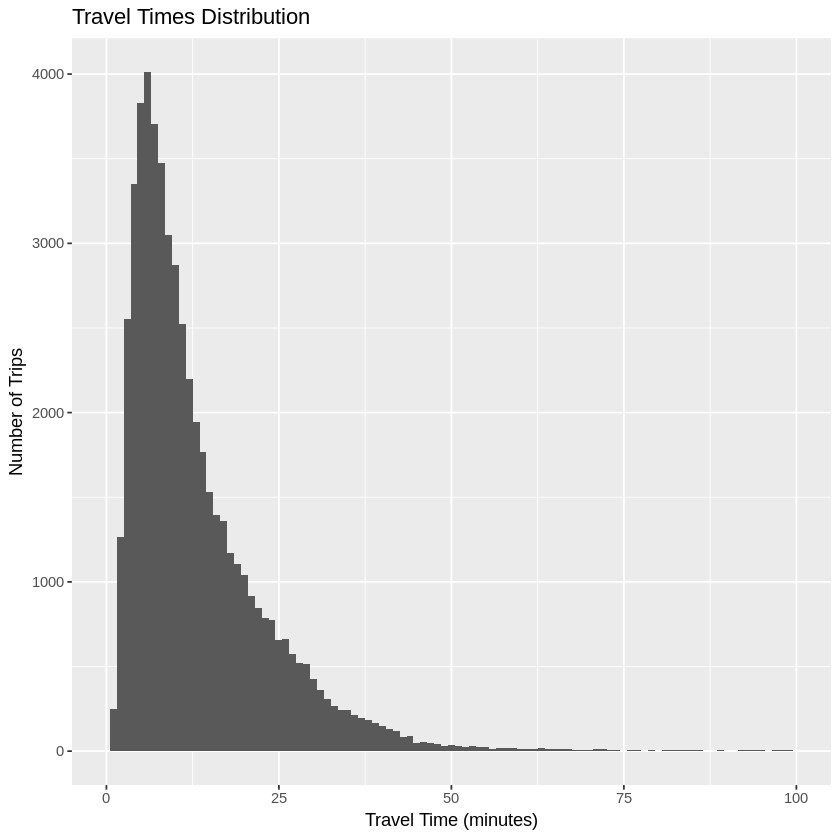

In [18]:
travel_hist = function(data) {
    ggplot(aes(x=Trip.Duration/60), data = data) +
    geom_histogram()+
    coord_cartesian(xlim = c(0,100))+
    ggtitle("Travel Times Distribution")+
    labs(x = 'Travel Time (minutes)', y = "Number of Trips")
    }
travel_hist(ny)
summary_function = function(data) {
    summary(data$Trip.Duration/60)
}
summary_function(ny)

**Above is the histogram and summary statistics for trip durations in New York.**

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
    1.005     6.848    11.783    20.566    20.554 15076.523         1 

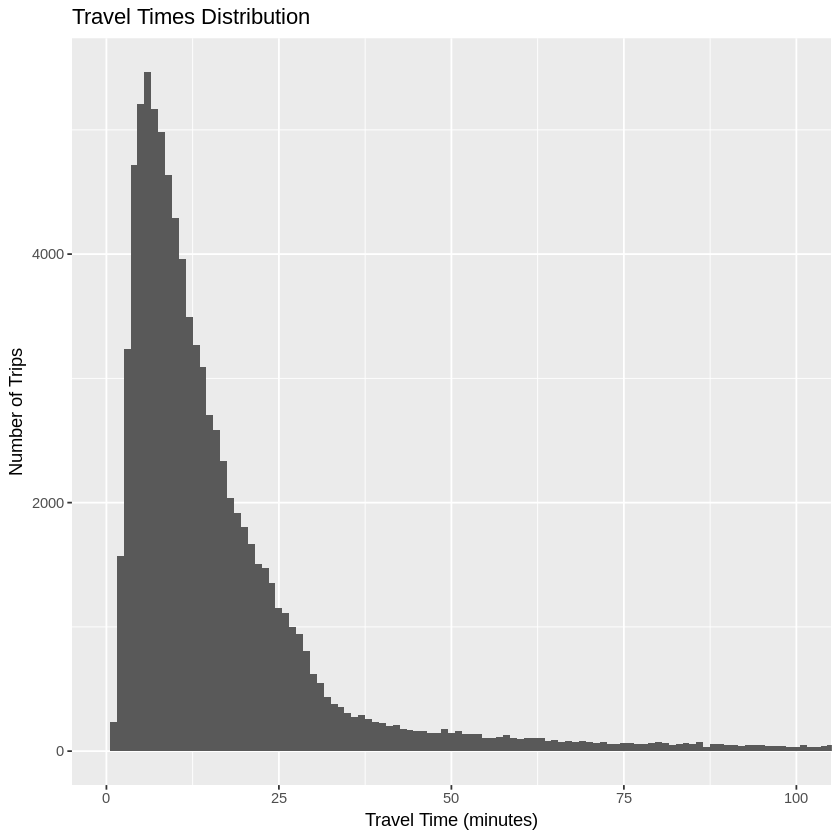

In [19]:
travel_hist(wash)
summary_function(wash)

**Above are the summary statistics and histogram showing the distribution of travel times in Washington.**

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.000    6.571   11.167   15.620   18.650 1423.467 

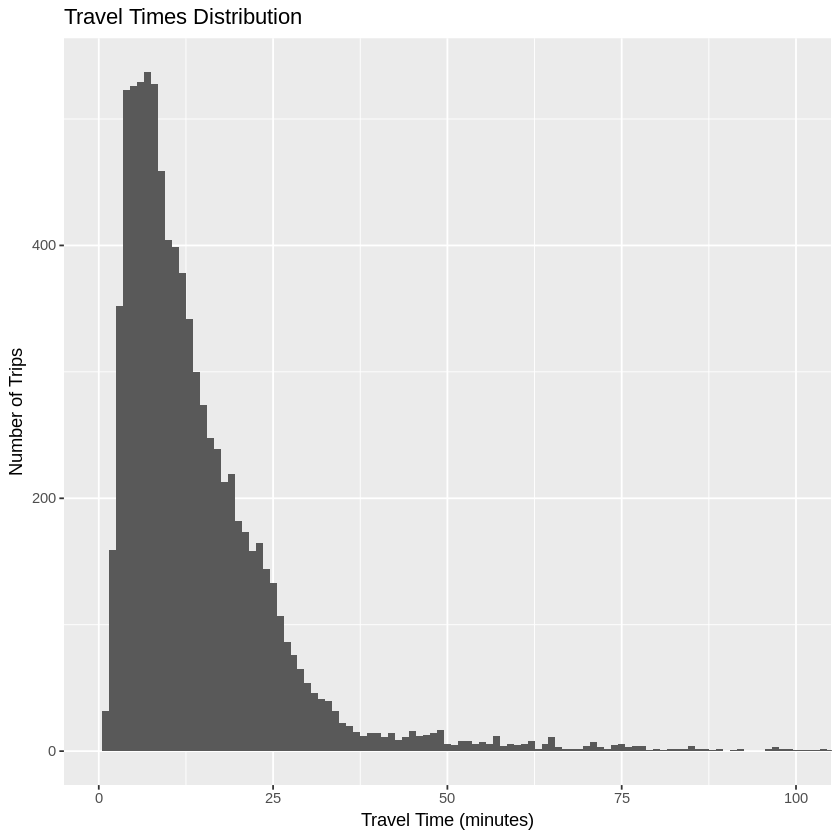

In [20]:
travel_hist(chi)
summary_function(chi)

 **Lastly, above shows the summary statistics and histogram for travel times by users in Chicago. Below is a full conclusion and analysis of the findings.**

**When creating boxplots to examine the distribution of trip durations in each of the 3 cities, it became clear that there were many outliers with very long trip durations, the highest being over 18,000 minutes in New York. For that reason, any trips under 100 minutes were not included to get the most accurate depiction of the distribution of trip lengths. Median was used as the main measure to prevent the outliers from having too much impact. The median trip duration in minutes in New York is 10.167 minutes. The median trip duration in Washtington is 11.783 minutes, and the median trip duration in Chicago is 11.167. It appears that on average, Washington has the longest trips, and also the most variability, as the interquartile range is the largest.**

### Question 2

**Does the average age of users differ in New York and Chicago? By how much?**

Warning message:
“Removed 5218 rows containing non-finite values (stat_bin).”

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1885    1970    1981    1978    1988    2001    5218 

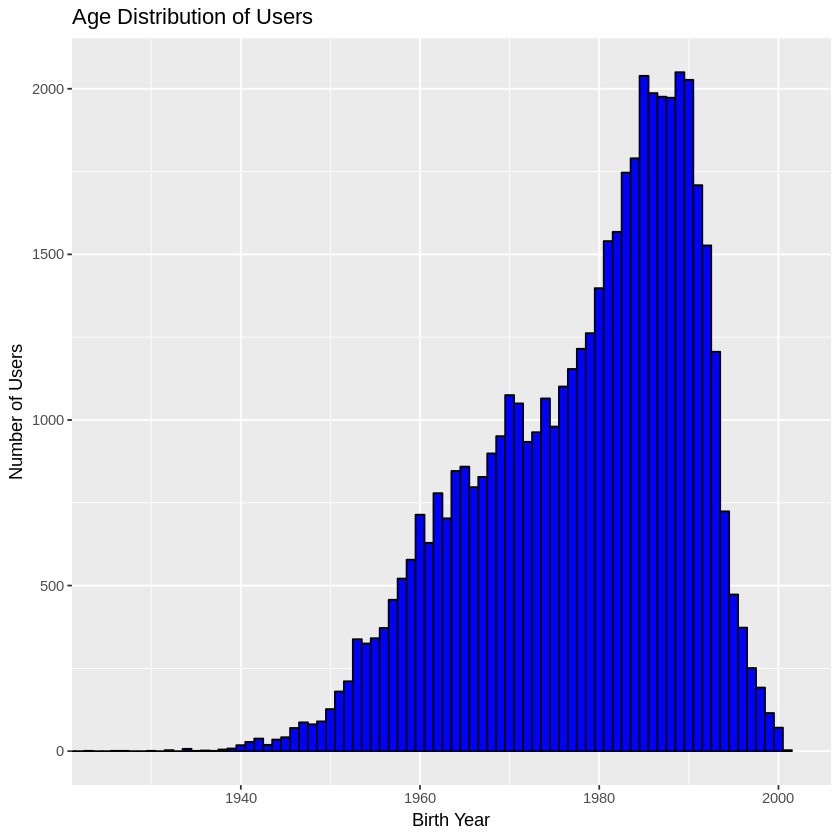

In [24]:
age_hist = function(data) {
    ggplot(aes(x=Birth.Year), data = data) +
    geom_histogram(binwidth = 1, color = "black", fill = "blue") +
    coord_cartesian(xlim = c(1925, 2002)) + 
    ggtitle("Age Distribution of Users")+
    xlab("Birth Year")+
    ylab("Number of Users") 
}
age_hist(ny)
summary_age = function(data) {
    summary(data$Birth.Year)
}
summary_age(ny)

Warning message:
“Removed 1747 rows containing non-finite values (stat_bin).”

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   1899    1975    1984    1981    1989    2002    1747 

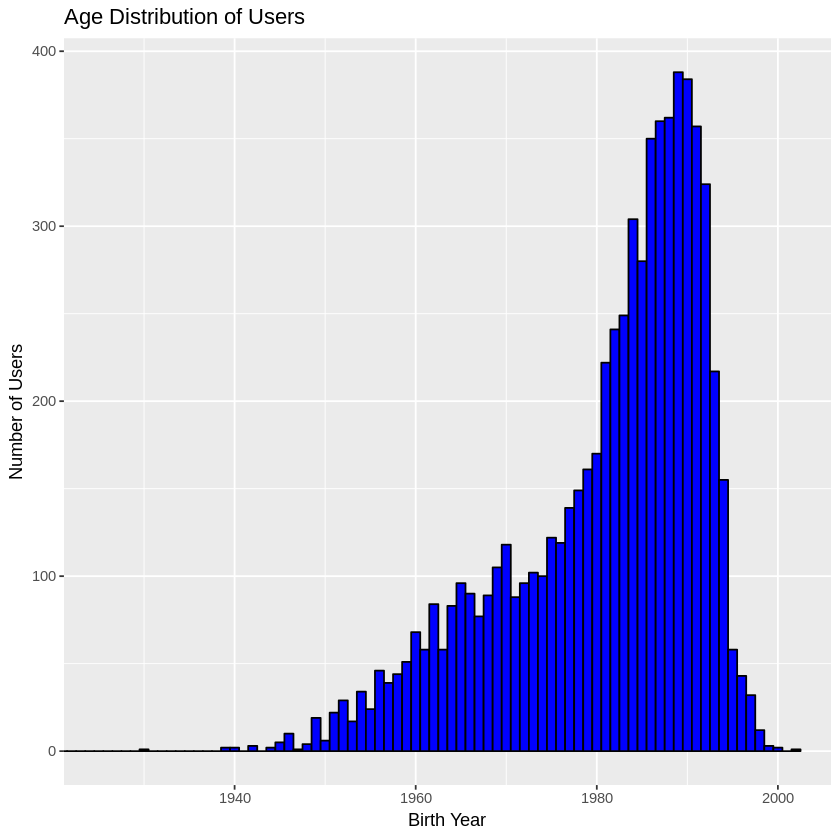

In [25]:
age_hist(chi)
summary_age(chi)

**The median birth year in New York was 1981 and the mean birth year in New York was 1978. This means the median age in 2020 of a user in New York is 39 and the mean age is 42. In Chicago, the median birth year is 1984 and the age is 36. The mean birth year is 1981 and the mean age is 39. The mean is higher than the median in both cities because the mean is more impacted by the outliers, namely those who claim to have been born in the 1800s. While the age distributions appear to be quite similar as evidenced by the histograms, Chicago users seem to be younger than New York users.**

### Question 3

**How does trip duration vary based on age in New York?**

Warning message:
“Removed 5218 rows containing non-finite values (stat_summary).”Warning message:
“Removed 5218 rows containing missing values (geom_point).”

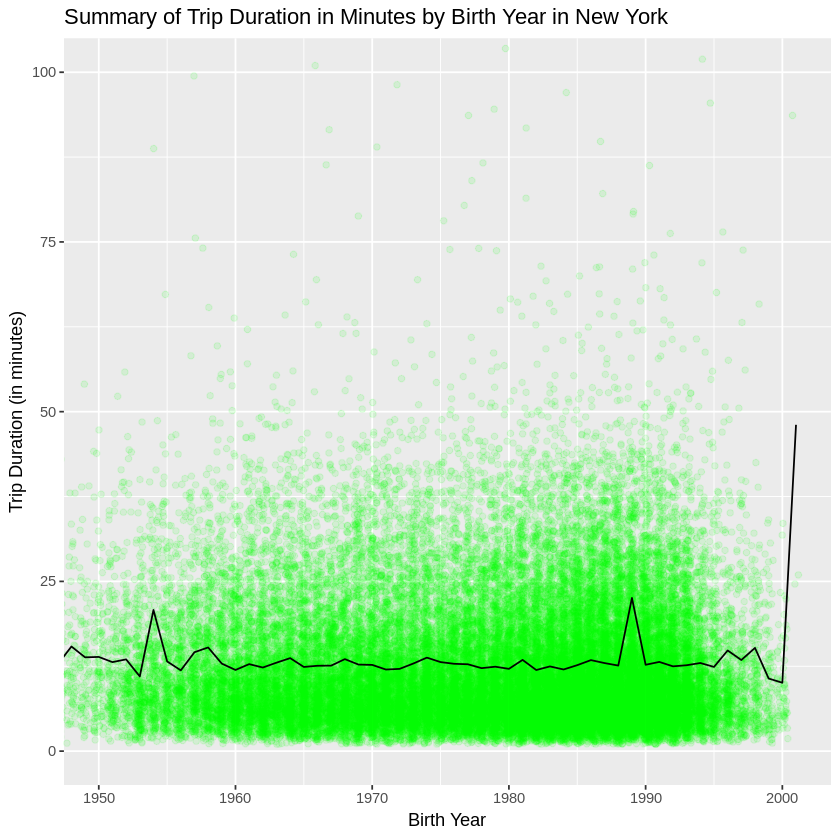

In [37]:
ggplot(aes(x=Birth.Year, y=Trip.Duration/60), data = ny) +
    geom_jitter(alpha = 1/10, color = "green") +
    coord_cartesian(ylim = c(0,100), xlim = c(1950, 2001)) + 
    geom_line(stat="summary", fun.y = mean) + 
    ggtitle("Summary of Trip Duration in Minutes by Birth Year in New York") +
    labs(x = "Birth Year", y = "Trip Duration (in minutes)")

**In order to create the graph above, only individuals with birth years between 1950 and 2001 were included as to not skew the data. Because there were many outliers for trip duration, no trips over 100 minutes were included. While there are spikes in 1955 and 1990, there does not appear to be a clear trend in trip duration based on age, as seen in the scatter plot above.**


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [26]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')